In [1]:
from IPython.display import display, Image

# Redes Neurais Artificiais (sem metafora cognitiva)

* Antes: Função de predição: $f(x) = Wx$

* Agora: Rede neural de duas camadas: $f(x) = W_2 max(0, W_1x)$
ou Rede neural de 3 camadas: $f(x) = W_3 max(0, W_2 max(0, W_1x))$

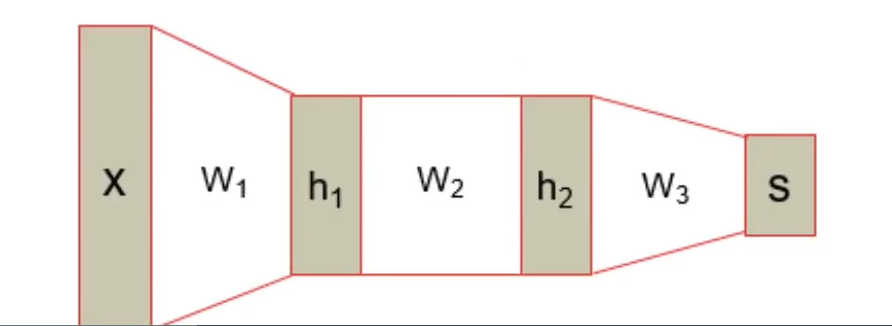

In [2]:
display(Image('Imagens/Imagem0001.png'))

## Código de treinamento de rede neural de duas camadas

In [3]:
import numpy as np

N, D_in, H, D_out = 64, 1000, 100, 10 # Dimensoes da rede: 64 amostras/ 1000 dimensões / 100 dimensao da camada oculta / 10 resultados de saida
x, y = np.random.randn(N, D_in), np.random.randn(N, D_out) # Valores de x e y iniciados aleatoriamente (valores deve ser obtidos atraves do conjunto de dados do problema)
w1, w2 = np.random.randn(D_in, H), np.random.randn(H, D_out) # Valores dos pesos iniciadis de forma aleatoria

print(w1.shape)


for t in range(2001):
    h = 1 / (t + np.exp(-x.dot(w1))) # Calculando o valor da camada escondida, nesse caso pela sigmoide
    y_pred = h.dot(w2) # Predição do valor 
    loss = np.square(y_pred - y).sum() #função de perda Quadratica
    
    if (t % 100 == 0):
        print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y) # Calculo do gradiente da função de perda em relação aos pesos 
    grad_w2 = h.T.dot(grad_y_pred)
    grad_h = grad_y_pred.dot(w2.T)
    grad_w1 = x.T.dot(grad_h * h * (1 - h))

    w1 -= 1e-4 * grad_w1 # corrigindo os pesos com base no gradiente obtido
    w2 -= 1e-4 * grad_w2

(1000, 100)
0 5.98312172151165e+96
100 1.026377272418158e+181
200 2.5691803855877625e+180
300 1.1358633515663377e+180
400 6.377638973314948e+179
500 4.1098890463340854e+179
600 2.848379435392829e+179
700 2.0979381627989018e+179
800 1.6098688352085444e+179
900 1.2621737502247931e+179
1000 1.0219858385358428e+179
1100 8.504447064875604e+178
1200 7.15664417458667e+178
1300 6.095634888372713e+178
1400 5.197332442667518e+178
1500 4.563538017970749e+178
1600 4.016274704904698e+178
1700 3.549106287583653e+178
1800 3.1613827699257852e+178
1900 2.8616511523571546e+178
2000 2.560610433319984e+178


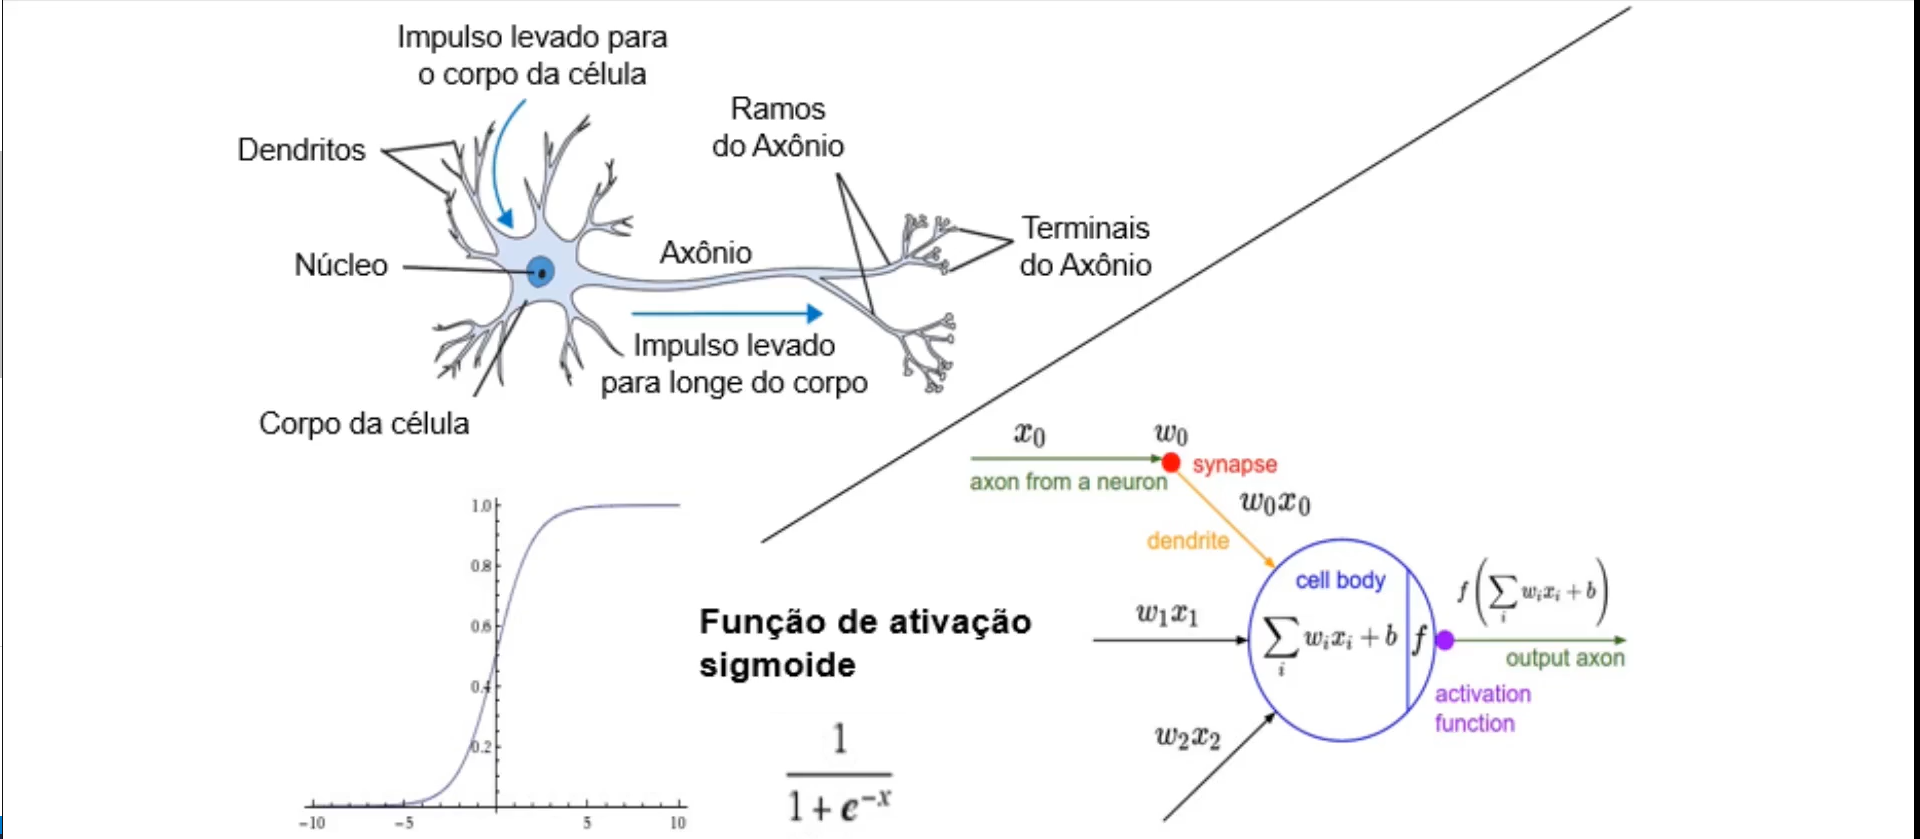

In [4]:
display(Image('Imagens/Imagem0002.png'))

### Exemplo de código de neuronio matematico

In [5]:
class Neuronio:

    def __init__(self, input_size: int):
        self.bias = np.random.randn()
        self.weigths = input_size

    @property
    def weigths(self):
        return self.__weigths

    @weigths.setter
    def weigths(self, input_size: int):
        self.__weigths = np.random.randn(input_size)

    def predict(self, inputs: np.ndarray):
        cell_body_sum = np.sum(np.dot(self.weigths, inputs)) + self.bias
        firing_rate = self.__activation_function(cell_body_sum)
        return firing_rate

    def __activation_function(self, body):
        return 1 / (1 + np.exp(-body))

In [6]:
class Rede:
    def __init__(self, rede):
        self.__camadas = []
        self.__rede = rede
        self.__setup()

    def __setup(self):
        for i, r in enumerate(self.__rede):

            if i == 0:
                continue

            neuronios = [Neuronio(self.__rede[i - 1]) for _ in range(r)]
            self.__camadas.append(dict(rede=i, neuronios=neuronios, tamanho=len(neuronios)))

    def __update_first_layer(self, inputs_size: int):
        layer = self.__camadas[0]
        tamanho = layer['tamanho']
        layer['neuronios'] = [Neuronio(inputs_size) for _ in range(tamanho)]
        self.__camadas[0] = layer

    def fit(self, X: np.ndarray):
        input_size = X.shape[1]
        self.__update_first_layer(input_size)

        for i, x in enumerate(X):
            print('x: ', x)
            inputs = np.copy(x)
            for layer in self.__camadas:
                inputs = [n.predict(inputs) for n in layer['neuronios']]

            print(inputs)
            

In [13]:
rede = Rede([3, 2, 2, 1])
rede.fit(np.array(
    [
        [3,4,5],
        [1,5,7],
        [9,8,9],
        [1,5,7]
    ]))

x:  [3 4 5]
[0.4351132438361152]
x:  [1 5 7]
[0.410919523173662]
x:  [9 8 9]
[0.4479615775899738]
x:  [1 5 7]
[0.410919523173662]


## Cuidados com Analogias

**Neurônio bilógicos**

* Varios tipos diferentes de neurônios

* Dendritos pode realizar computações não lineares

* Sinapses não representam apenas um "simples peso" mas sim um complexo sistema dinâmico não linear

fonte: London, M., & Häusser, M. Dendritic computation. Annual Review of Neuroscience, 28: 503-532, (2005).

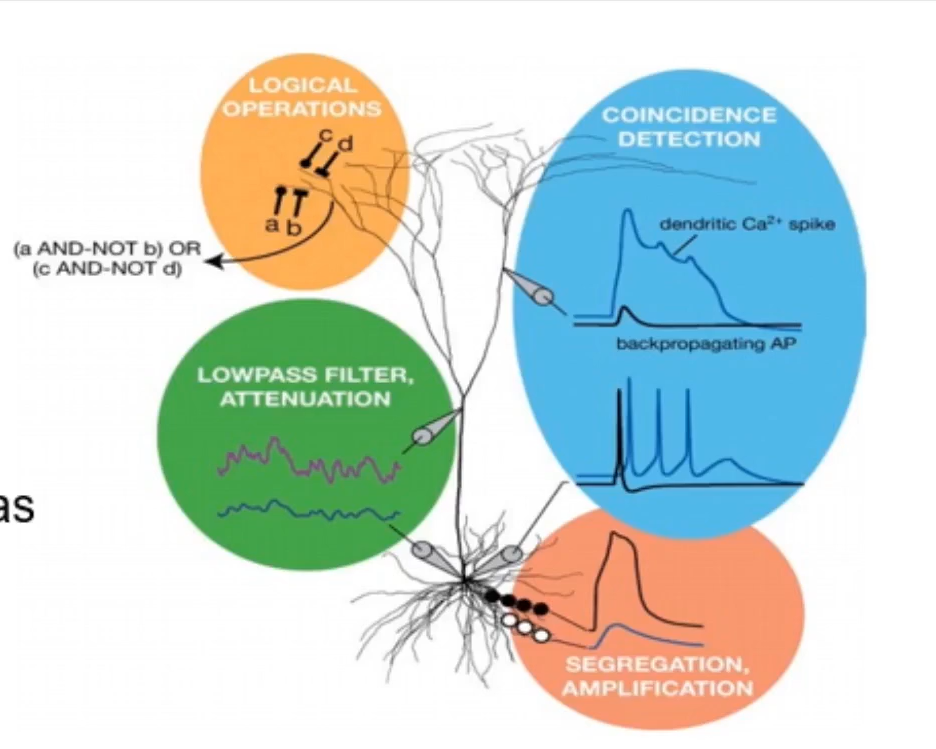

In [8]:
display(Image('Imagens/Imagem0003.png'))

## Funçoes de ativação

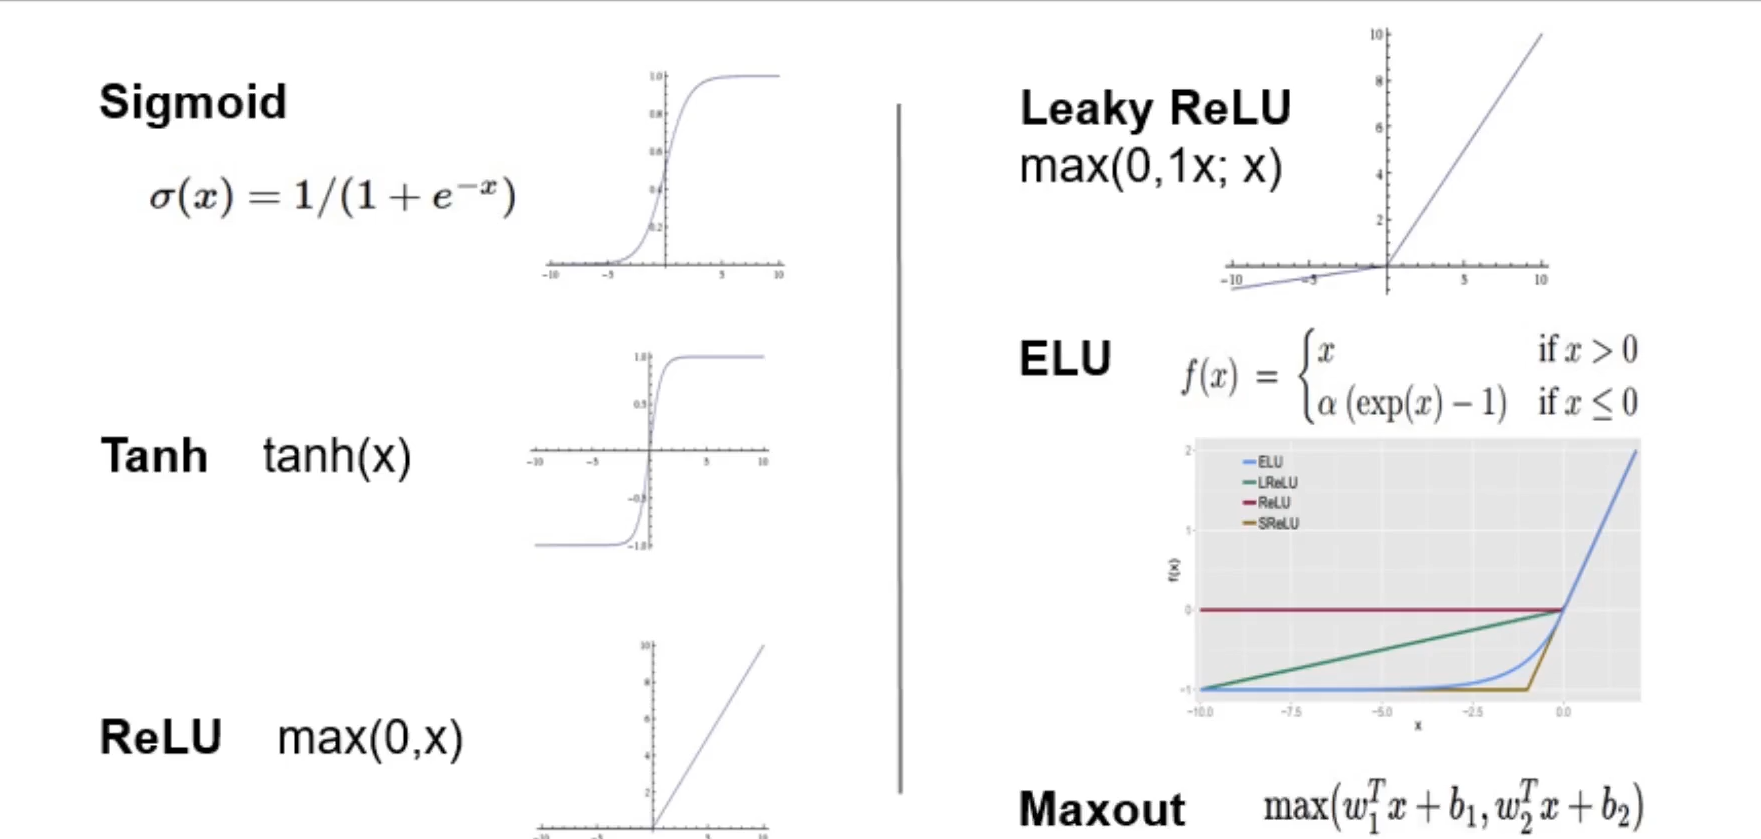

In [9]:
display(Image('Imagens/Imagem0004.png'))

## Arquiteturas de Redes Neurais

### Rede Neural Feed-Forward

* Redes neurais feed-forward possuem uma ou mais camada ocultas

* 

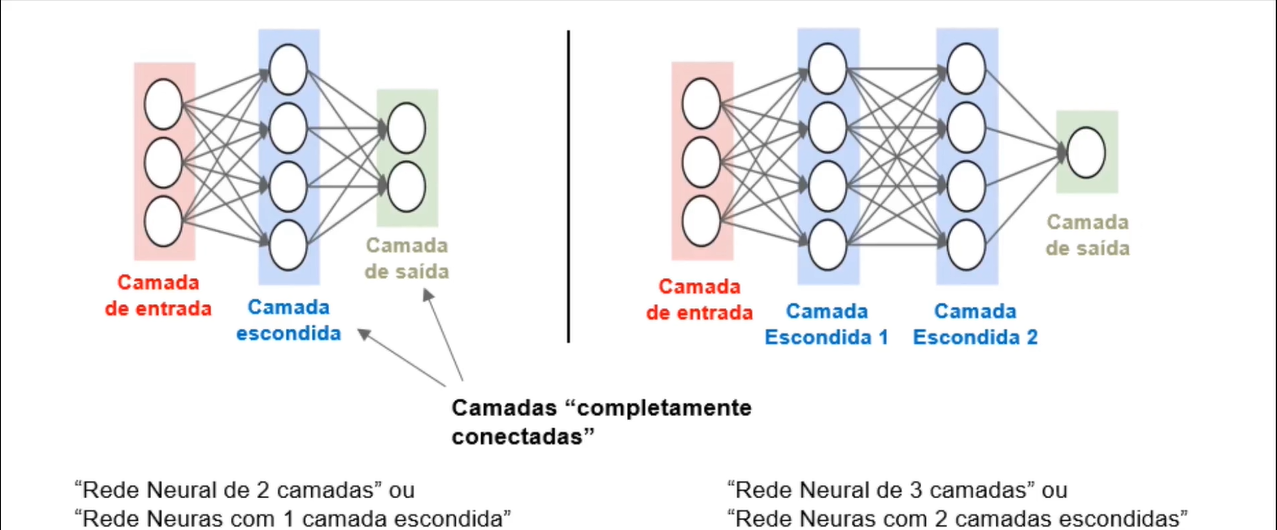

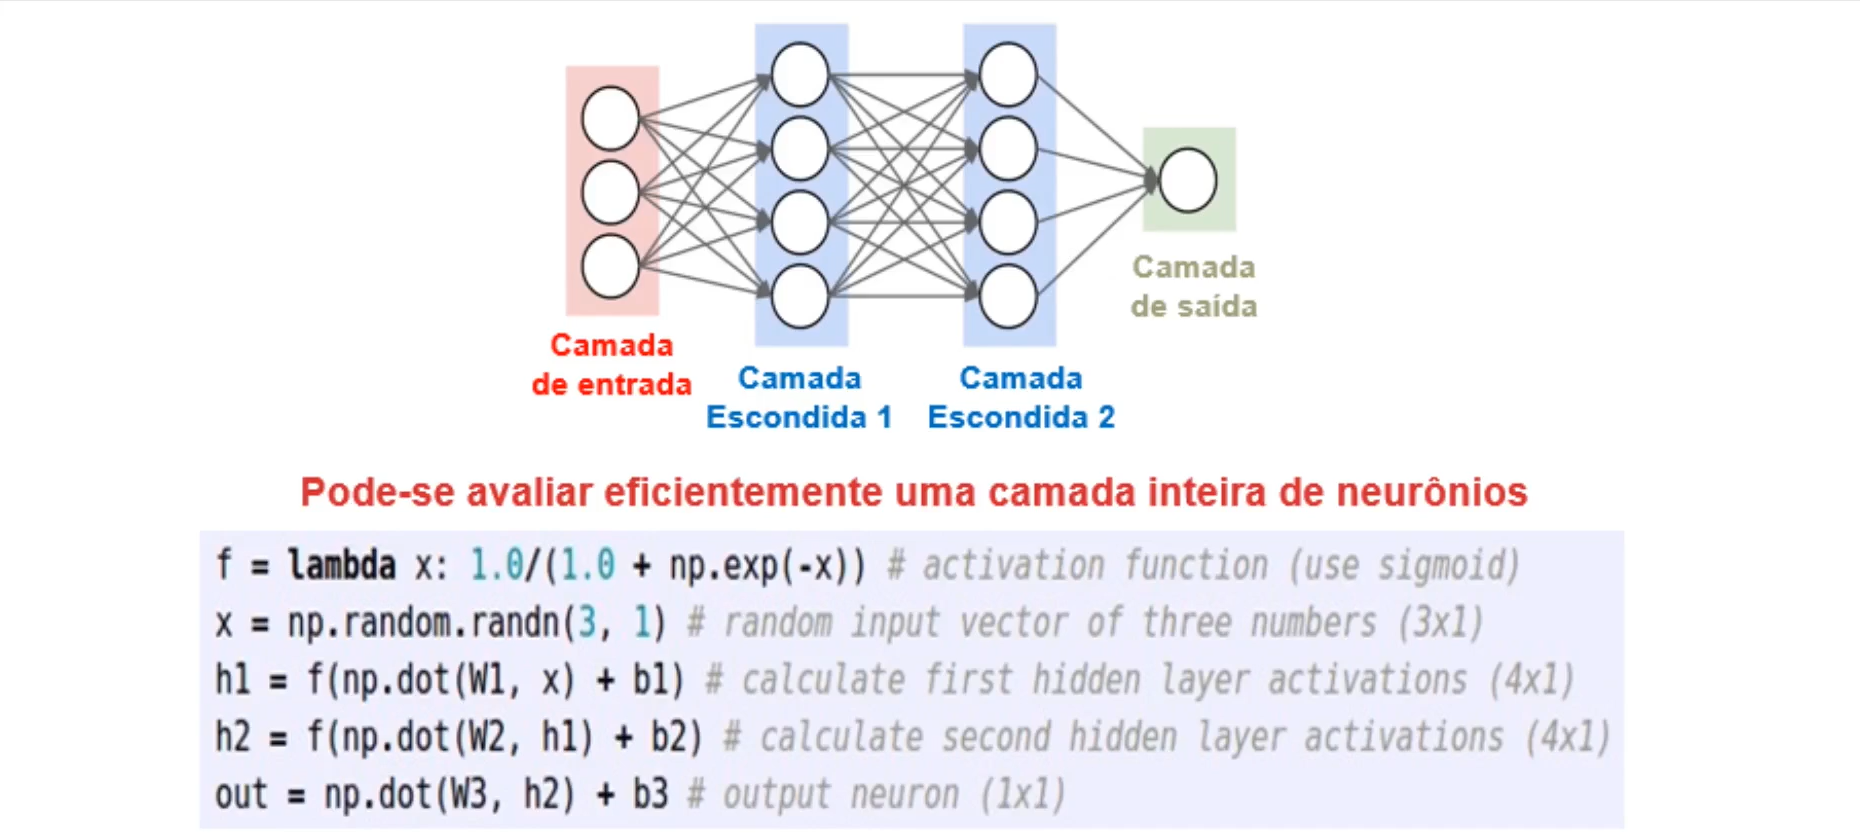

In [10]:
display(Image('Imagens/Imagem0005.png'),Image('Imagens/Imagem0006.png'))

In [45]:
f = lambda x: 1 / (1 + np.exp(-x))

x = np.array([[2],[3],[4]])

# Pesos para cada camada com os respectivos pesos em cada neuronio
# A linha representa a quantidade de neuronios na camada
# A coluna representa a quantidade de pesos para as entradas de cada neuronio
W1, W2, W3 = np.random.randn(4,3), np.random.randn(4,4), np.random.rand(1, 4)

# Os bias para remover a linearidade
b1, b2, b3 = np.random.randn(), np.random.randn(), np.random.randn()

h1 = f(np.dot(W1, x) + b1)
h2 = f(np.dot(W2, h1) + b2)
out = f(np.dot(W3, h2) + b3)

print(out.flatten())

[0.52583952]


(4, 1)
